# by: Abdulrahman Saeed

## Raisin Classification
• Build a Decision Tree model with the dataset. free to do any kind of EDA (using all statistical tools and methodology) as per choice and play around with the data. Following are the must have things for submission of project :

    ♦ Proper EDA with explanation of impactful and useful variables
    ♦ Graphs wherever necessary
    ♦ Metrics for model evaluation:
            ♦ Confusion Matrix
            ♦ Accuracy Score
            ♦ F1 score, Precision, Recall, ROC-AUC 
            ♦ Model Optimization using K fold cross validation
            
• Consider column O (Class) as the target (y) variable and rest of the columns as feature variables

## import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, mean_absolute_error, accuracy_score, roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('Raisin_Dataset.csv')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


### Basic Information of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


### Summary statistics

In [4]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


#### Checking Missing Values

In [5]:
df.isna().any().sum()

0

Insight : There are no missing values.

## EDA

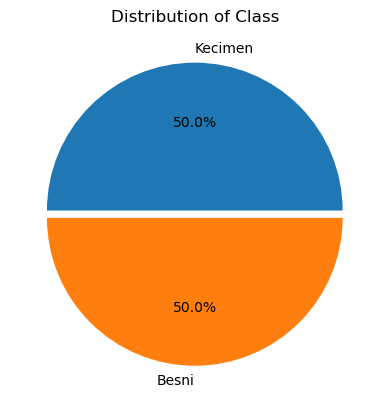

In [6]:
plt.pie(df.Class.value_counts(), labels=df.Class.value_counts().index, explode=(0.025,0.025), autopct='%1.1f%%')
plt.title("Distribution of Class")
plt.show()

### Checking distribution of columns using histplot

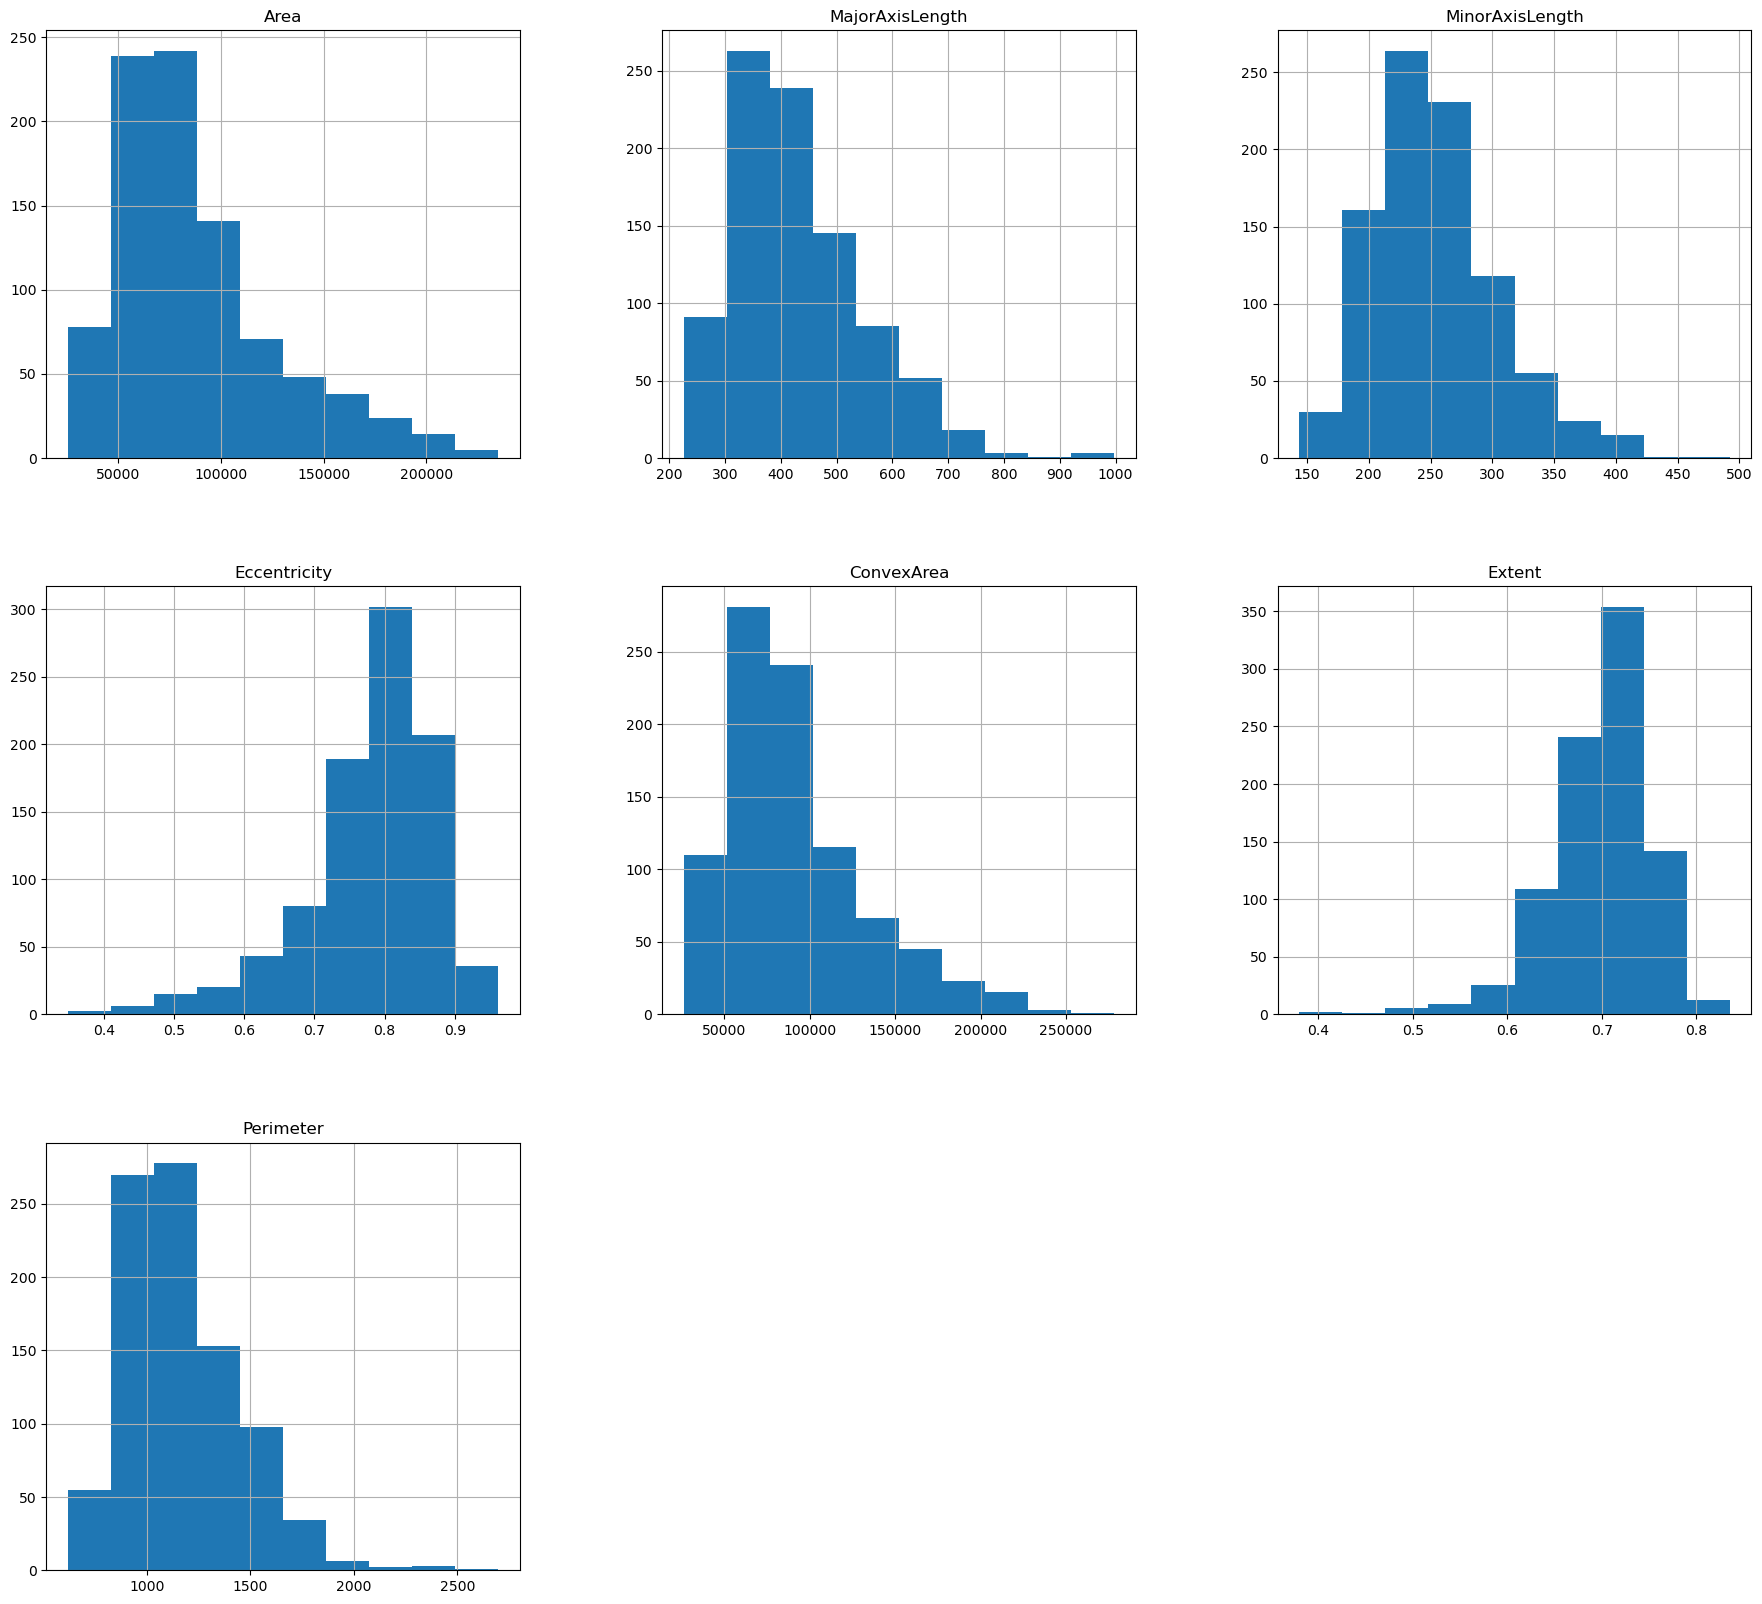

In [7]:
df.hist(figsize=(22, 20))
plt.show()

•♦• there are outlier To see the outliers more clearly, we might employ a common plot. A boxplot is a common visual representation of the distribution using a five-number summary as the basis:

                                                    ♦ Minimum
                                                    ♦ First quartile (Q1)
                                                    ♦ Median
                                                    ♦ Third quartile (Q3)
                                                    ♦ Maximum
                                                    
        •♦• It can uncover anomalies and their values. Additionally, it can reveal the degree to which our data is grouped, symmetrical, and skewed.

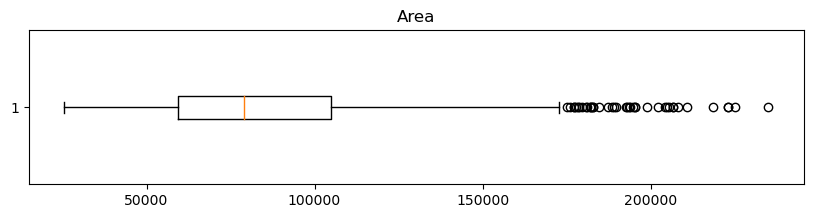

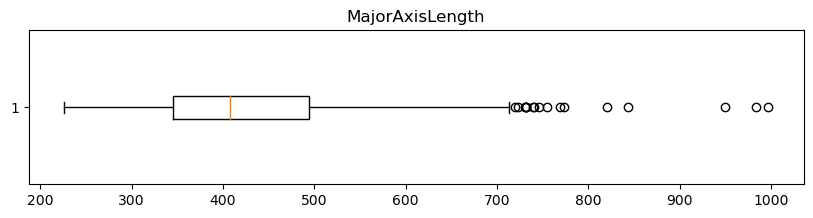

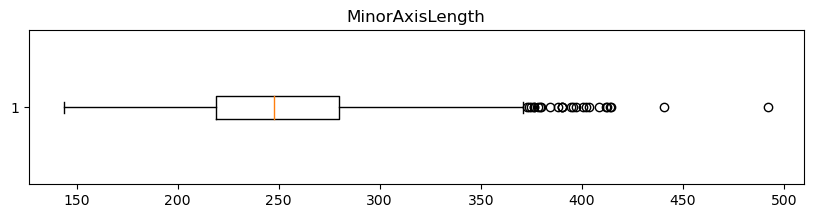

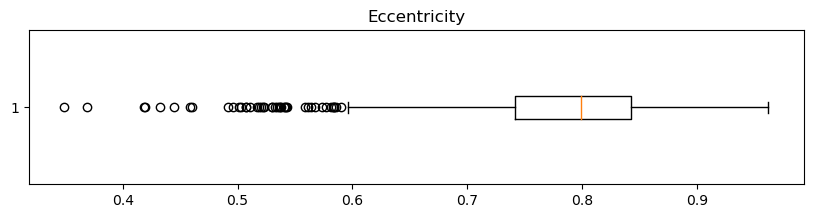

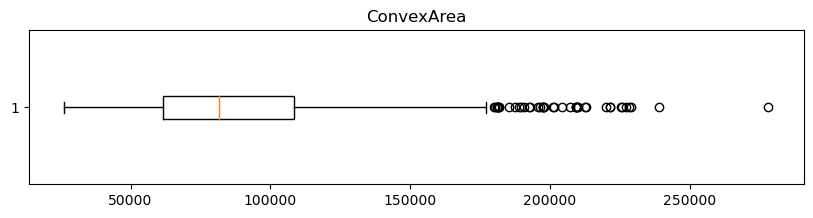

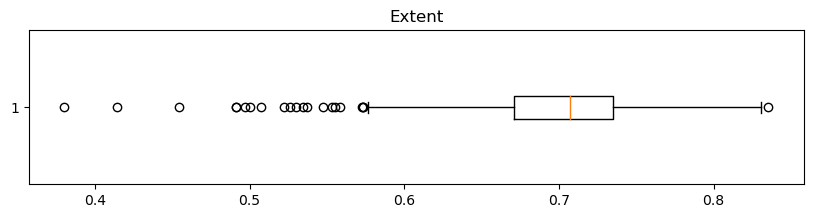

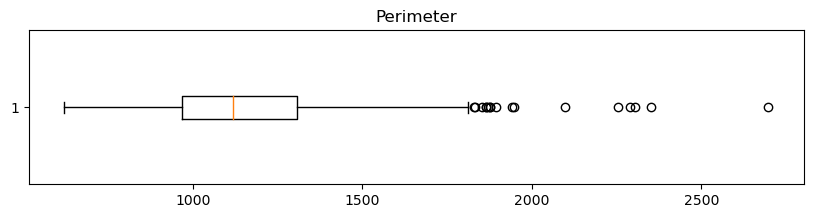

In [8]:
cols = ['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']

for col in cols:
    plt.figure(figsize=(10,2))
    plt.boxplot(data=df, x=col, vert=False)
    plt.title(col)
    plt.show()

### Remove outlier

In [9]:
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

IQR_lower_limit = Q1 - 1.5 * IQR
IQR_upper_limit = Q3 + 1.5 * IQR

outliers = (df[cols]<IQR_lower_limit) | (df[cols]>IQR_upper_limit)

df = df[~outliers.any(axis=1)]

In [10]:
df.shape

(795, 8)

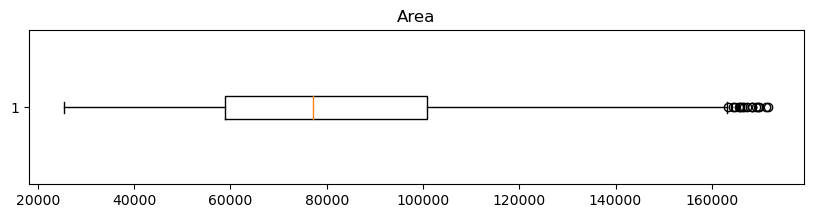

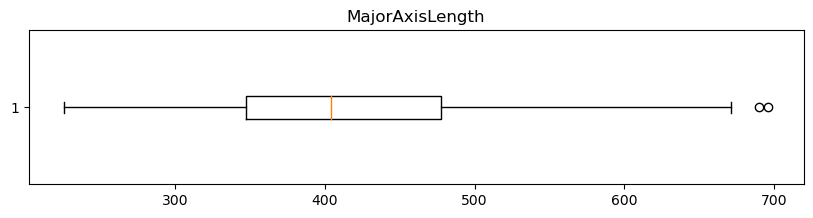

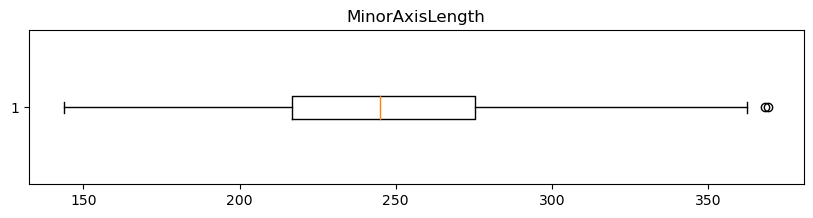

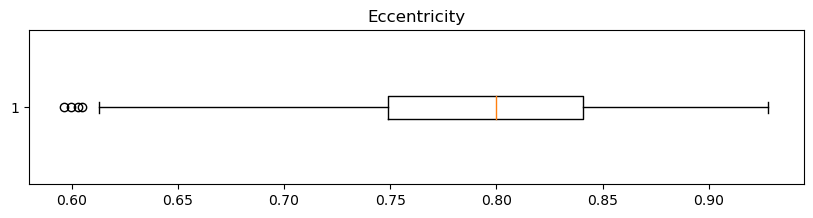

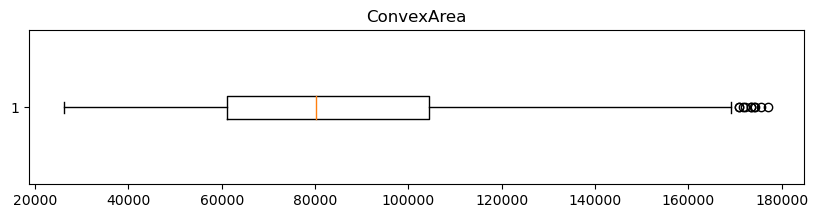

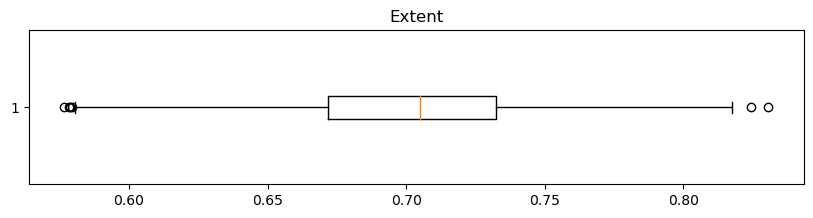

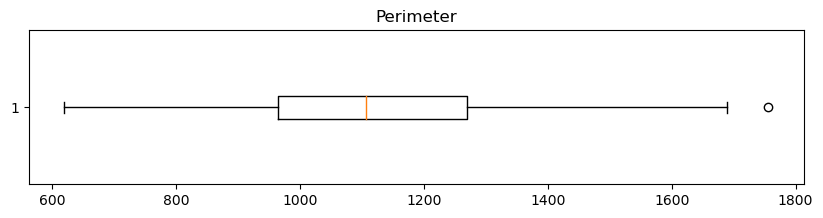

In [11]:
for col in cols:
    plt.figure(figsize=(10,2))
    plt.boxplot(data=df, x=col, vert=False)
    plt.title(col)
    plt.show()

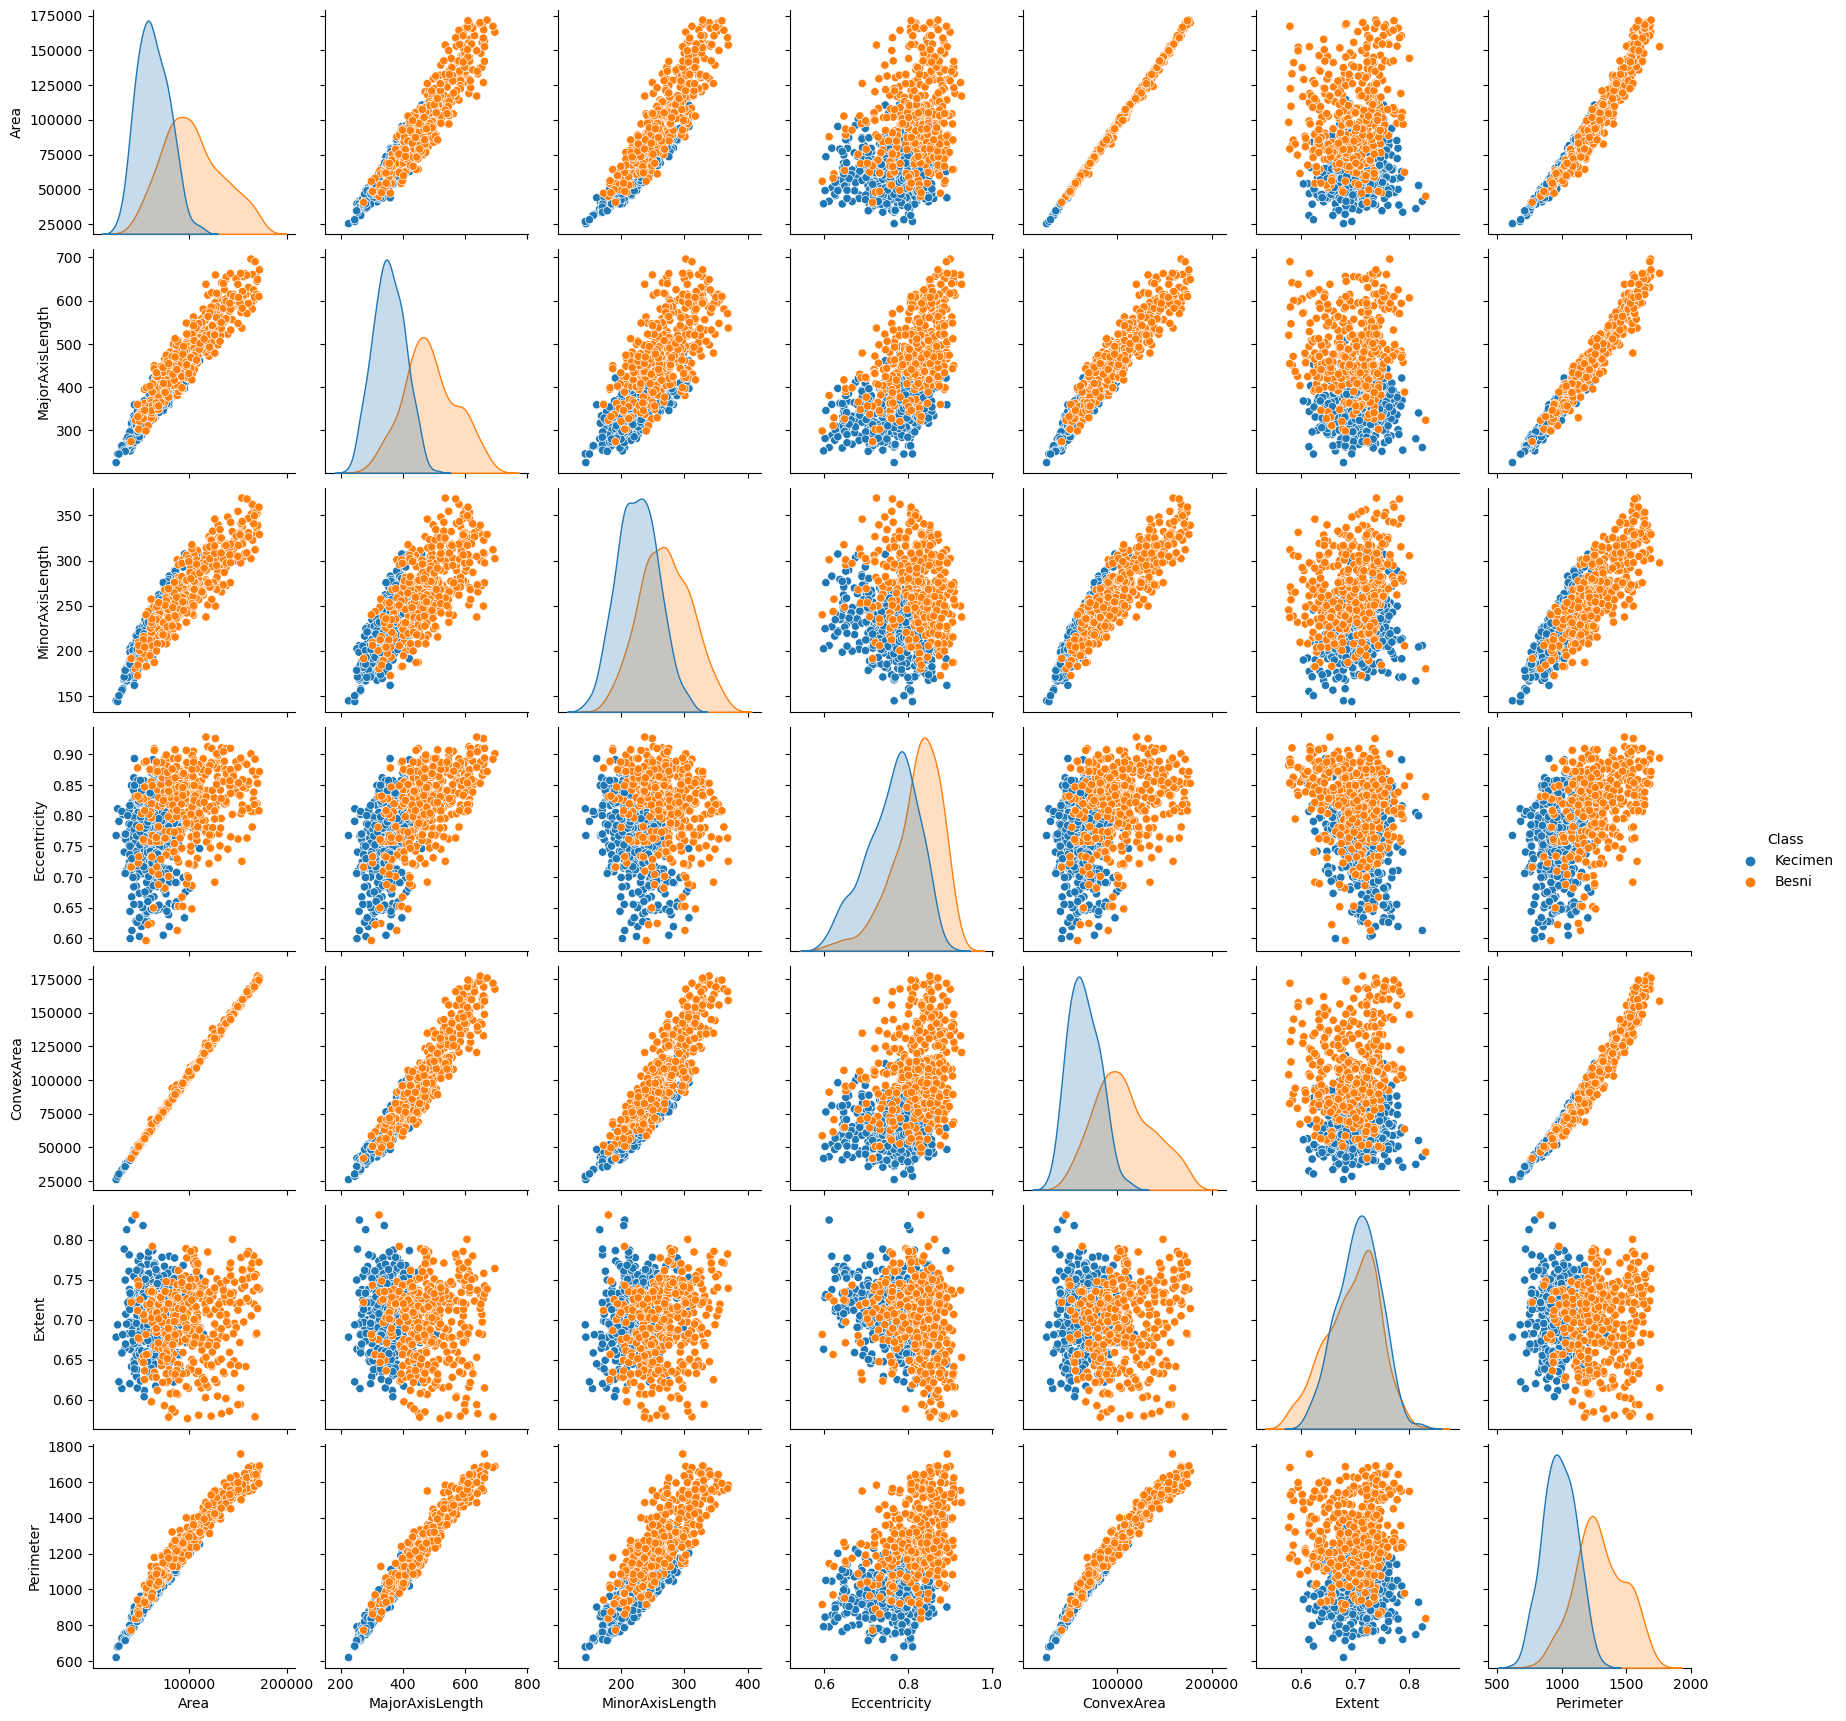

In [12]:
sns.pairplot(df, hue="Class")
plt.show()

### Checking correlation between variables

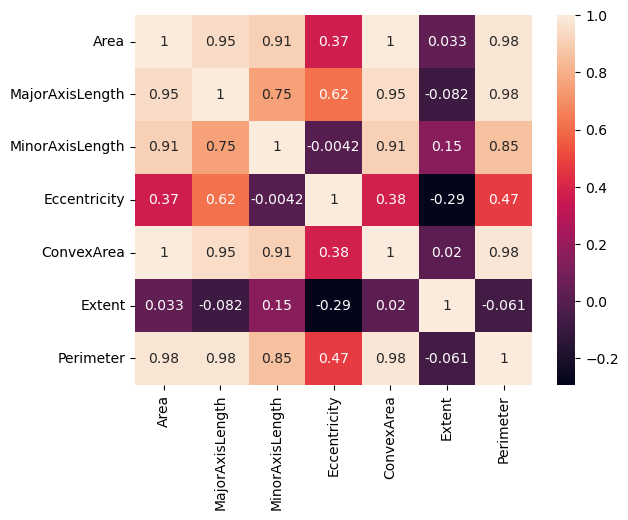

In [13]:
sns.heatmap(df.corr(), annot=True)
plt.show()

there are a big colleration between 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'Perimeter'

## Feature Engineering

In [14]:
df.drop(['MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'Perimeter'], axis = 1, inplace = True )

### Label Encoding

In [15]:
df['Class'] = LabelEncoder().fit_transform(df['Class'])

### Split data into train and test

In [16]:
X = df.drop(columns='Class')
y = df['Class']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True, random_state=42)

In [18]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(636, 3)
(636,)
(159, 3)
(159,)


### Building Prediction Model using Decision Tree Classifier

In [19]:
model = DecisionTreeClassifier()

In [20]:
params = {'max_depth': [None, 3, 5]}

In [21]:
clf = GridSearchCV(model, params).fit(X_train, y_train)

In [22]:
y_pred = clf.best_estimator_.predict(X_test)

<Axes: >

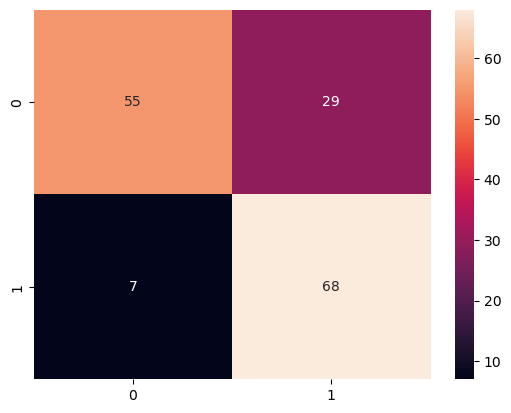

In [23]:
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt=".0f")

In [24]:
mean_absolute_error(y_test, y_pred)

0.22641509433962265

In [25]:
accuracy_score(y_test, y_pred)

0.7735849056603774

In [26]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7807142857142857

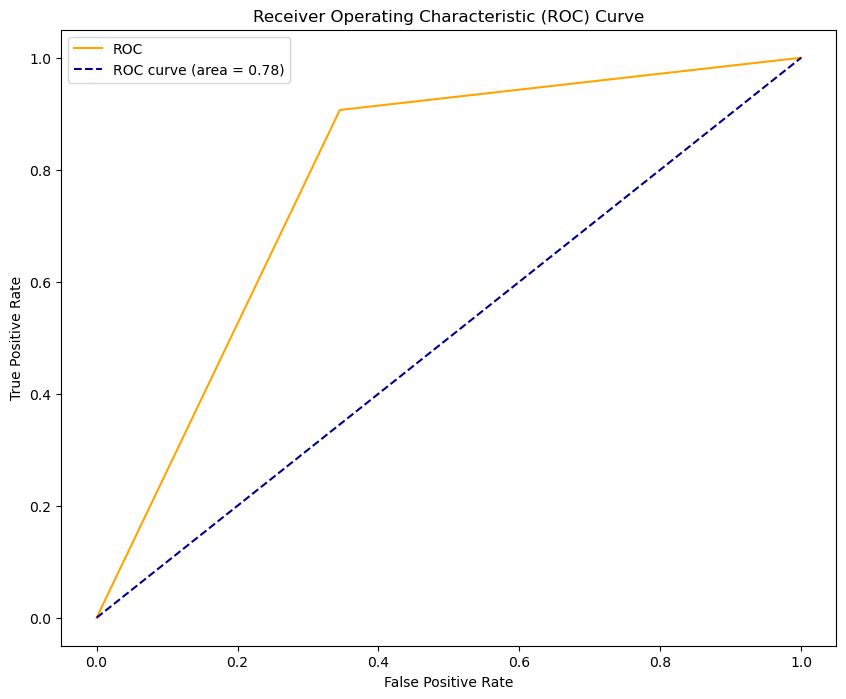

In [27]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [28]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
scores

array([0.80242231, 0.79900498, 0.77139303, 0.82836562, 0.75459513])

In [29]:
scores.mean()

0.7911562159396757